# Generation of binary images containing different type and size of shapes

This notebook generates binary images for the Counting simple shapes (circles, sqaures or diamonds) experiemnt. (Code from https://github.com/rpmcruz/cnn-count has been used as a starting point and modified accordingly).

### Settings

In [1]:
# Imports
from CNNcount import shape_images as si
import numpy as np
import matplotlib.pyplot as plt
from numpy import savez, load
import os.path

In [2]:
# define constants
NIM = 60000
NMIN, NMAX = 1, 3  # nbr of shapes
RMIN, RMAX = 2, 6  # shape radius
IMGSIZE = 64
OCCL = 0

In [3]:
# filenames for saving the data as NPZ files (NumPy compressed)
same_shape_same_radius_fname = "/home/elena/eStep/XAI/Data/CountingShapes/circles_same_radius_60k.npz"
same_shape_diff_radii_fname = "/home/elena/eStep/XAI/Data/CountingShapes/diamonds_diff_radii_60k.npz"
diff_shapes_same_radius_fname = "/home/elena/eStep/XAI/Data/CountingShapes/diff_shapes_same_radius_60k.npz"
diff_shapes_diff_radii_fname = "/home/elena/eStep/XAI/Data/CountingShapes/diff_shapes_diff_radii_60k.npz"

## Generation of binary images with up to 3 of the same shape (circle) and same radius

In [4]:
# generate large training set of NIM images with the same type and same radius
if os.path.isfile(same_shape_same_radius_fname): # already generated- just load
    print ("The file containing images of the same shape (circle) with same radius already exist!")
    # load from NPZ file for display
    data = load(same_shape_same_radius_fname)
    images=data['images']
    labels=data['labels']
    print("Size of data: ", np.shape(images))
    print("Size of labels: ", np.shape(labels))
else:
    print ("Generating data...") # generate data
    shape_type_ind = 0 # circles
    shape_radius = int((RMIN+RMAX)/2)
    X = np.zeros(shape=(NIM,IMGSIZE,IMGSIZE,1), dtype = np.float32)
    Y = np.zeros(shape=(NIM), dtype = np.uint8)
    for i in range(NIM):
        n = int(np.random.randint(NMIN, NMAX+1))
        shapes = [(shape_type_ind, shape_radius) for _ in range(n)]
        img = si.generate_image(IMGSIZE, shapes, OCCL)
        X[i,:,:,:] = img[np.newaxis, :, :, np.newaxis].astype(np.float32)
        Y[i]=n
    print("The images of the same shape (circle) with same radius have been generated!");
    print("Size of data: ", np.shape(X))
    print("Size of labels: ", np.shape(Y))
    print ("Saving data...")
    # save the generated data as NPZ file
    savez(same_shape_same_radius_fname,images=X,labels=Y)
    images = X
    labels = Y

Generating data...
The images of the same shape (circle) with same radius have been generated!
Size of data:  (60000, 64, 64, 1)
Size of labels:  (60000,)
Saving data...


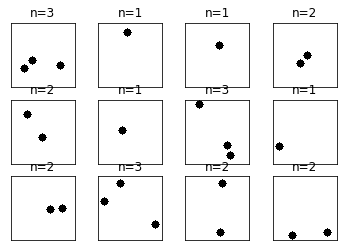

In [5]:
# plot random 12 of the generated NIM images
si.plot_12images(images, labels)

## Generation of binary images with up to 3 of the same shape (diamond) with different radii

In [6]:
# generate NIMD test images with the same shape and different radii
if os.path.isfile(same_shape_diff_radii_fname): # already generated- just load
    print ("The file containing images of the same shape (diamonds) with different radii already exist!")
    # load from NPZ file for display
    data = load(same_shape_diff_radii_fname)
    images=data['images']
    labels=data['labels']
    print("Size of data: ", np.shape(images))
    print("Size of labels: ", np.shape(labels))
else:
    print ("Generating data...") # generate data
    shape_type_ind = 1 # diamonds
    shape_radius = int((RMIN+RMAX)/2)
    X = np.zeros(shape=(NIM,IMGSIZE,IMGSIZE,1), dtype = np.float32)
    Y = np.zeros(shape=(NIM), dtype = np.uint8)
    for i in range(NIM):
        n = int(np.random.randint(NMIN, NMAX+1))
        shapes = [(shape_type_ind, np.random.randint(RMIN, RMAX)) for _ in range(n)]
        img = si.generate_image(IMGSIZE, shapes, OCCL)
        X[i,:,:,:] = img[np.newaxis, :, :, np.newaxis].astype(np.float32)
        Y[i]=n
    print("The images of the same shape (diamonds) with different radii have been generated!");
    print("Size of data: ", np.shape(X))
    print("Size of labels: ", np.shape(Y))
    print ("Saving data...")
    # save the generated data as NPZ file
    savez(same_shape_diff_radii_fname,images=X,labels=Y)
    images = X
    labels = Y


Generating data...
The images of the same shape (diamonds) with different radii have been generated!
Size of data:  (60000, 64, 64, 1)
Size of labels:  (60000,)
Saving data...


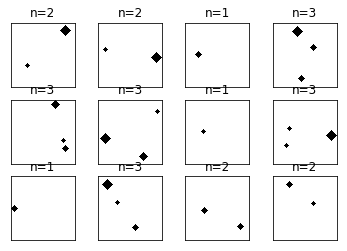

In [7]:
# plot random 12 of the generated NIM images
si.plot_12images(images, labels)

## Generation of binary images with up to 3 different shapes (circle, diamond, square) with the same radius

In [8]:
# generate NIM test images with random type shapes and same radius
num_shapes = len(si.SHAPES)
if os.path.isfile(diff_shapes_same_radius_fname): # already generated- just load
    print ("The file containing images of the different shapes (circle, diamond, square) with same radius already exist!")
    # load from NPZ file for display
    data = load(same_shape_same_radius_fname)
    images=data['images']
    labels=data['labels']
    print("Size of data: ", np.shape(images))
    print("Size of labels: ", np.shape(labels))
else:
    print ("Generating data...") # generate data
    
    shape_radius = int((RMIN+RMAX)/2)
    X = np.zeros(shape=(NIM,IMGSIZE,IMGSIZE,1), dtype = np.float32)
    Y = np.zeros(shape=(NIM), dtype = np.uint8)
    for i in range(NIM):
        n = int(np.random.randint(NMIN, NMAX+1))        
        shapes = [(np.random.randint(num_shapes), shape_radius) for _ in range(n)]
        img = si.generate_image(IMGSIZE, shapes, OCCL)
        X[i,:,:,:] = img[np.newaxis, :, :, np.newaxis].astype(np.float32)
        Y[i]=n
    print("The images of different shapes with same radius have been generated!");
    print("Size of data: ", np.shape(X))
    print("Size of labels: ", np.shape(Y))
    print ("Saving data...")
    # save the generated data as NPZ file
    savez(diff_shapes_same_radius_fname,images=X,labels=Y)
    images = X
    labels = Y

Generating data...
The images of different shapes with same radius have been generated!
Size of data:  (60000, 64, 64, 1)
Size of labels:  (60000,)
Saving data...


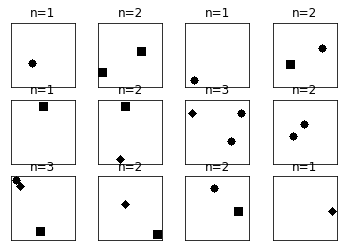

In [9]:
# plot random 12 of the generated NIM images
si.plot_12images(images, labels)

## Generation of binary images with up to 3 different shapes (circle, diamond, square) with different radii

In [10]:
# generate NIMD test images with random type shapes and random radius
num_shapes = len(si.SHAPES)
if os.path.isfile(diff_shapes_diff_radii_fname): # already generated- just load
    print ("The file containing images of the different shapes (circle, diamond, square) with different radii already exist!")
    # load from NPZ file for display
    data = load(same_shape_same_radius_fname)
    images=data['images']
    labels=data['labels']
    print("Size of data: ", np.shape(images))
    print("Size of labels: ", np.shape(labels))
else:
    print ("Generating data...") # generate data
    
    shape_radius = int((RMIN+RMAX)/2)
    X = np.zeros(shape=(NIM,IMGSIZE,IMGSIZE,1), dtype = np.float32)
    Y = np.zeros(shape=(NIM), dtype = np.uint8)
    for i in range(NIM):
        n = int(np.random.randint(NMIN, NMAX+1))        
        shapes = [(np.random.randint(num_shapes), np.random.randint(RMIN, RMAX)) for _ in range(n)]
        img = si.generate_image(IMGSIZE, shapes, OCCL)
        X[i,:,:,:] = img[np.newaxis, :, :, np.newaxis].astype(np.float32)
        Y[i]=n
    print("The images of different shapes with different radii have been generated!");
    print("Size of data: ", np.shape(X))
    print("Size of labels: ", np.shape(Y))
    print ("Saving data...")
    # save the generated data as NPZ file
    savez(diff_shapes_diff_radii_fname,images=X,labels=Y)
    images = X
    labels = Y        


Generating data...
The images of different shapes with different radii have been generated!
Size of data:  (60000, 64, 64, 1)
Size of labels:  (60000,)
Saving data...


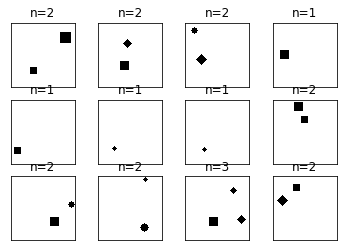

In [11]:
# plot random 12 of the generated NIM images
si.plot_12images(images, labels)